<h1 style="color:rgb(0,84,119);text-align:center;">skeletonizing algorithms</h1>

<h3 style="color:rgb(0,84,119);text-align:center;">Poorya MohammadiNasab</h3>
<h3 style="color:rgb(0,84,119);text-align:center;">400722138</h3>

<hr>

Methods:
1) Zha84: Zhang, T. Y., & Suen, C. Y. (1984). A fast parallel algorithm for thinning digital patterns. Communications of the ACM, 27(3), 236-239.

2) Lee94: Lee, T. C., Kashyap, R. L., & Chu, C. N. (1994). Building skeleton models via 3-D medial surface axis thinning algorithms. CVGIP: Graphical Models and Image Processing, 56(6), 462-478.

3) Medial axis skeletonization

<hr>

In [163]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, medial_axis
import cv2
import scipy.ndimage as ndimage
import numpy as np

In [264]:
def examine(image_path):
    #read image
    image = cv2.imread(image_path , 0)
    
    # apply Otsu algorithm 
    ret, thresh = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    image_bin = thresh > 50
    image_bin_inv = np.invert(image_bin)
    
    # Thinning algorithm
    skeleton_Zhang = skeletonize(image_bin, method = 'zhang')
    skeleton_Zhang = np.invert(np.bool_(skeleton_Zhang))
    skeleton_Lee   = skeletonize(image_bin, method = 'lee')
    
    # Compute the medial axis (skeleton) and the distance transform
    distance_img= ndimage.distance_transform_edt(image_bin)
    morph_laplace_img = ndimage.morphological_laplace(distance_img, (3, 3))
    skeleton_MAT = morph_laplace_img < morph_laplace_img.min()/2

    skeleton_MAT = skeleton_MAT > 0
    skeleton_MAT = np.invert(skeleton_MAT)
    
    
    # plot results
    fig, axs = plt.subplots(2, 2,figsize=(16,9))
    
    axs[0, 0].imshow(image_bin, cmap='gray')
    axs[0, 0].set_title('Orginal image')
    axs[0, 0].axis('off')
    axs[0, 1].imshow(skeleton_MAT & image_bin, cmap='gray')
    axs[0, 1].set_title('medial axis transform')
    axs[0, 1].axis('off')
    axs[1, 0].imshow(skeleton_Zhang & image_bin, cmap='gray')
    axs[1, 0].set_title('Zhang thinning algorithm')
    axs[1, 0].axis('off')
    axs[1, 1].imshow(skeleton_Lee + image_bin, cmap='gray')
    axs[1, 1].set_title('Lee thinning algorithm')
    axs[1, 1].axis('off')

<hr>

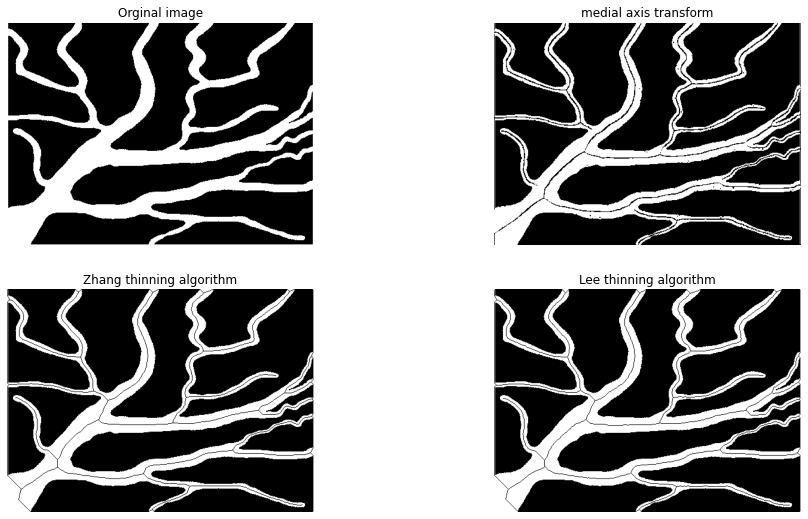

In [259]:
examine('./Img1.jpg')

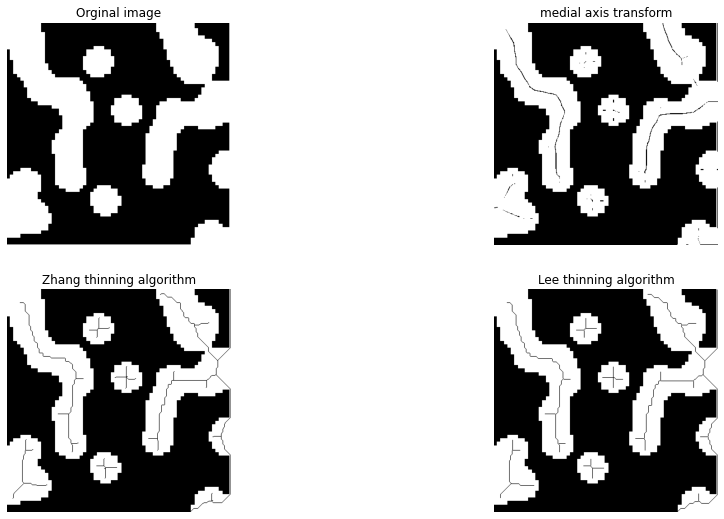

In [265]:
examine('./Img2.png')

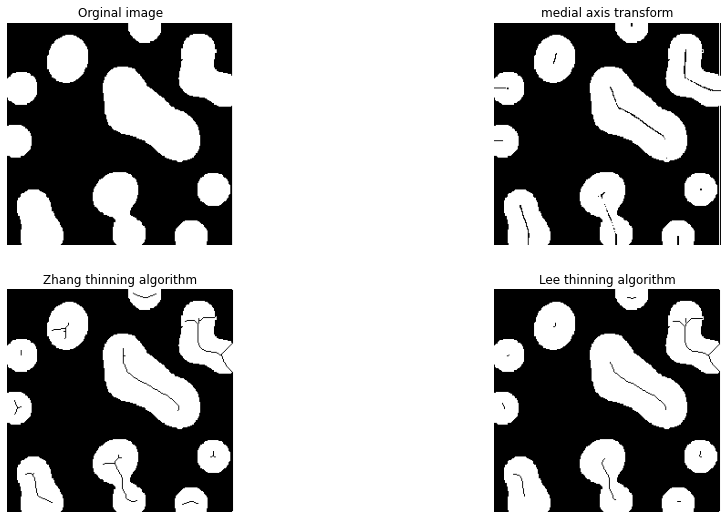

In [266]:
examine('./Img3.png')

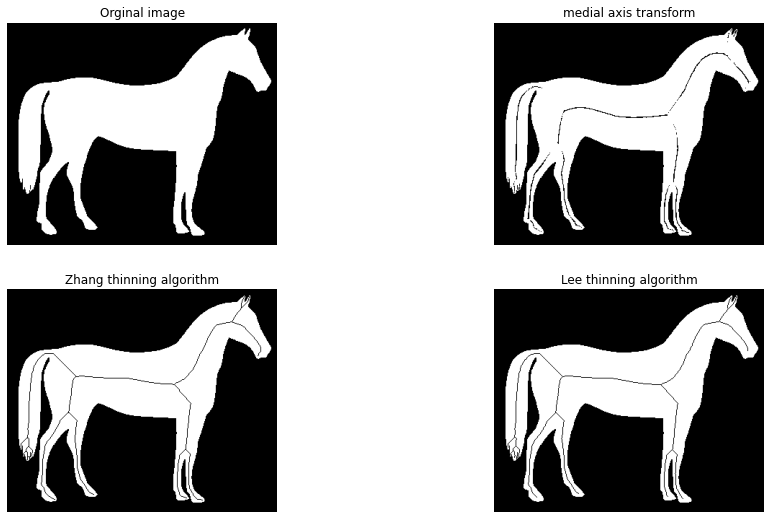

In [268]:
examine('./Img4.png')